In [1]:
print("Project 1")

Project 1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
y = (y != 0).astype(int)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]  


In [7]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

In [8]:
def accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

def precision(TP, FP):
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall(TP, FN):
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score_custom(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def mcc(TP, TN, FP, FN):
    return ((TP * TN) - (FP * FN)) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) > 0 else 0

def specificity(TN, FP):
    return TN / (TN + FP) if (TN + FP) > 0 else 0

def npv(TN, FN):
    return TN / (TN + FN) if (TN + FN) > 0 else 0



In [9]:
acc_manual = accuracy(TP, TN, FP, FN)
prec_manual = precision(TP, FP)
recall_manual = recall(TP, FN)
f1_manual = f1_score_custom(prec_manual, recall_manual)
mcc_manual = mcc(TP, TN, FP, FN)
specificity_manual = specificity(TN, FP)
npv_manual = npv(TN, FN)

In [10]:
acc_sklearn = accuracy_score(y_test, y_pred)
prec_sklearn = precision_score(y_test, y_pred)
recall_sklearn = recall_score(y_test, y_pred)
f1_sklearn = f1_score(y_test, y_pred)
mcc_sklearn = matthews_corrcoef(y_test, y_pred)

In [11]:
print("Manual Calculations vs Sklearn Metrics:")
print(f"Accuracy: {acc_manual:.4f} vs {acc_sklearn:.4f}")
print(f"Precision: {prec_manual:.4f} vs {prec_sklearn:.4f}")
print(f"Recall: {recall_manual:.4f} vs {recall_sklearn:.4f}")
print(f"F1-Score: {f1_manual:.4f} vs {f1_sklearn:.4f}")
print(f"MCC: {mcc_manual:.4f} vs {mcc_sklearn:.4f}")
print(f"Specificity: {specificity_manual:.4f}")
print(f"Negative Predictive Value: {npv_manual:.4f}")

Manual Calculations vs Sklearn Metrics:
Accuracy: 1.0000 vs 1.0000
Precision: 1.0000 vs 1.0000
Recall: 1.0000 vs 1.0000
F1-Score: 1.0000 vs 1.0000
MCC: 1.0000 vs 1.0000
Specificity: 1.0000
Negative Predictive Value: 1.0000


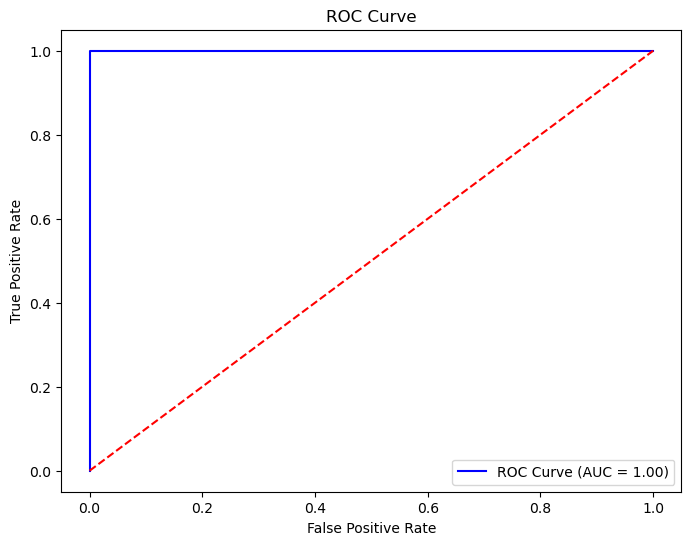

In [25]:
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [27]:
random_probs = np.random.rand(len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, random_probs)
auc_rand = auc(fpr_rand, tpr_rand)
print(f"AUC (Test Data): {roc_auc:.4f}")
print(f"AUC (Random Probabilities): {auc_rand:.4f}")

AUC (Test Data): 1.0000
AUC (Random Probabilities): 0.3855


array([[15,  0],
       [ 0, 23]], dtype=int64)